In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random 
import time 

$H_0: p = p_0$ 

$H_1: p > p_0$

In [3]:
α = 0.05 

In [4]:
sample_sizes = np.array( [30, 50, 70] + list( np.arange(100, 2100, 100) ) )
sample_sizes 

array([  30,   50,   70,  100,  200,  300,  400,  500,  600,  700,  800,
        900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900,
       2000])

In [5]:
p0s = np.arange(0.01, 0.21, 0.01)
p0s 

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ])

In [6]:
st = time.time() 

errors_total = []

for p0 in p0s: 

    errors_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 

        samples = np.random.binomial(1, p0, (10000, n)) 
        ys = samples.sum(axis = 1) 
    
        decisions = [None] * 10000 
    
        for i, y in enumerate(ys): 
            result = stats.binomtest(y, n, p0, alternative = "greater")
            if (result.pvalue <= α): 
                decisions[i] = 1 
            else: 
                decisions[i] = 0 
    
        type_I_error_sim = np.mean(decisions) 
        
        errors_per_n[k] = type_I_error_sim
    
    errors_total += errors_per_n

print()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 772.2299690246582 seconds


In [9]:
print( 
    len(errors_total), 
    len(sample_sizes), 
    len(p0s)
) 

460 23 20


In [10]:
a = [p0s[0]] * len(sample_sizes)

for i in range(1, len(p0s)): 
    a += [list(p0s)[i]] * len(sample_sizes)
    
#print(a)
len(a)

460

In [11]:
b = list(pd.Series(a).round(2))

In [12]:
d2 = {"p0": b, "n": list(sample_sizes) * len(p0s), "type_I_error": errors_total}
df2 = pd.DataFrame(d2)
df2

,p0,n,type_I_error
0,0.01,30,0.0356
1,0.01,50,0.0137
2,0.01,70,0.0346
3,0.01,100,0.0174
4,0.01,200,0.0151
...,...,...,...
455,0.20,1600,0.0455
456,0.20,1700,0.0478
457,0.20,1800,0.0451
458,0.20,1900,0.0516


In [13]:
df2.dtypes

p0              float64
n                 int32
type_I_error    float64
dtype: object

In [14]:
df22 = df2
df22["p0"] = df22["p0"].astype(str)
df22.dtypes 

p0               object
n                 int32
type_I_error    float64
dtype: object

In [15]:
df222 = df22.pivot_table(values = "type_I_error", index = "n", columns = "p0")
df222

p0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2
n,,,,,,,,,,,,,,,,,,,,
30,0.0356,0.0209,0.0120,0.0287,0.0164,0.0319,0.0152,0.0278,0.0472,0.0248,0.0413,0.0264,0.0350,0.0493,0.0280,0.0402,0.0222,0.0339,0.0444,0.0269
50,0.0137,0.0202,0.0176,0.0471,0.0364,0.0289,0.0243,0.0400,0.0332,0.0238,0.0448,0.0373,0.0256,0.0402,0.0313,0.0478,0.0379,0.0243,0.0406,0.0288
70,0.0346,0.0121,0.0208,0.0224,0.0224,0.0220,0.0227,0.0255,0.0506,0.0431,0.0410,0.0375,0.0335,0.0310,0.0288,0.0493,0.0427,0.0357,0.0326,0.0327
100,0.0174,0.0128,0.0287,0.0500,0.0291,0.0385,0.0502,0.0314,0.0341,0.0411,0.0472,0.0265,0.0296,0.0347,0.0368,0.0410,0.0479,0.0523,0.0287,0.0357
200,0.0151,0.0525,0.0389,0.0286,0.0421,0.0316,0.0399,0.0299,0.0316,0.0427,0.0463,0.0370,0.0415,0.0452,0.0490,0.0357,0.0402,0.0432,0.0467,0.0504
300,0.0298,0.0398,0.0350,0.0344,0.0506,0.0376,0.0517,0.0401,0.0460,0.0376,0.0417,0.0519,0.0403,0.0412,0.0465,0.0378,0.0429,0.0507,0.0508,0.0364
400,0.0210,0.0371,0.0364,0.0320,0.0509,0.0406,0.0348,0.0448,0.0371,0.0421,0.0379,0.0384,0.0487,0.0360,0.0420,0.0460,0.0385,0.0409,0.0455,0.0461
500,0.0296,0.0459,0.0293,0.0463,0.0450,0.0412,0.0347,0.0497,0.0428,0.0454,0.0383,0.0446,0.0365,0.0388,0.0485,0.0407,0.0444,0.0454,0.0423,0.0442
600,0.0425,0.0371,0.0446,0.0440,0.0397,0.0421,0.0365,0.0432,0.0397,0.0439,0.0438,0.0462,0.0404,0.0442,0.0407,0.0454,0.0486,0.0387,0.0485,0.0450


In [16]:
df222.columns

Index(['0.01', '0.02', '0.03', '0.04', '0.05', '0.06', '0.07', '0.08', '0.09',
       '0.1', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18',
       '0.19', '0.2'],
      dtype='object', name='p0')

In [17]:
df222["0.07"].index

Int64Index([  30,   50,   70,  100,  200,  300,  400,  500,  600,  700,  800,
             900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900,
            2000],
           dtype='int64', name='n')

In [18]:
import matplotlib as mpl
mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["font.style"] = "normal"

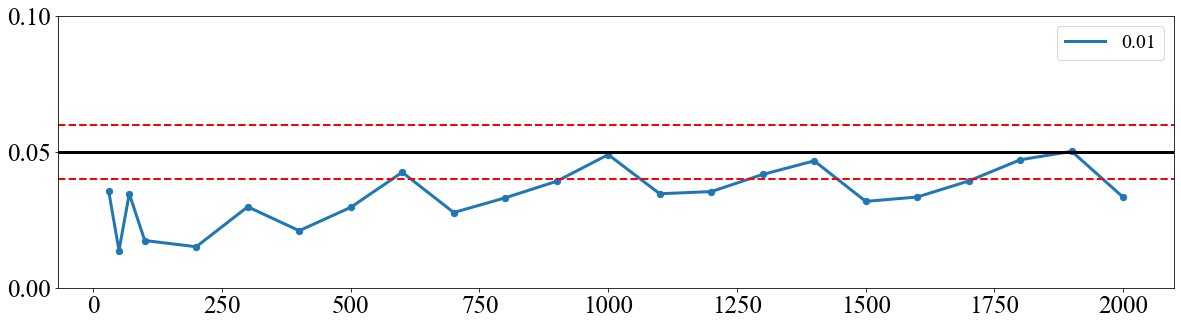

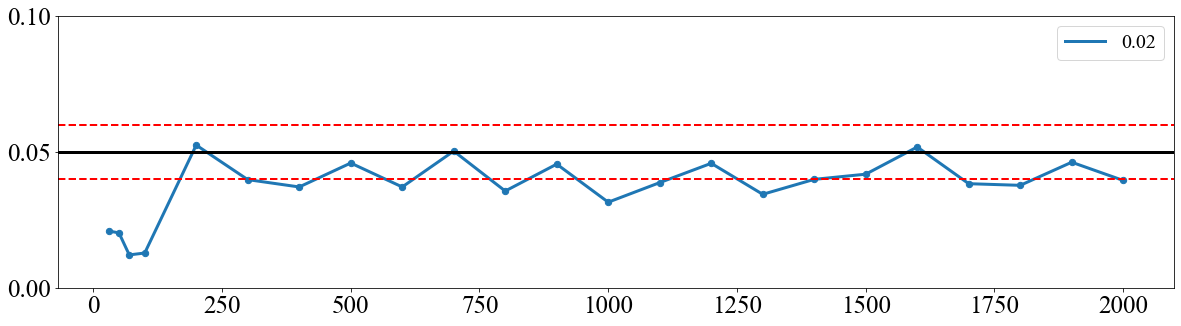

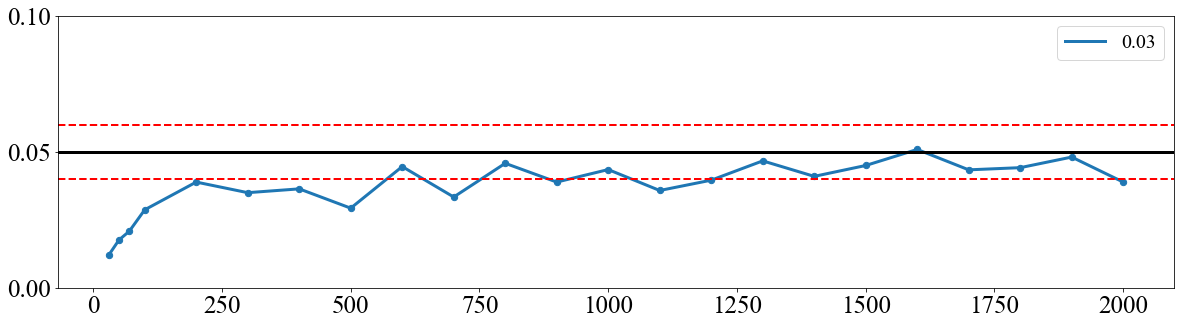

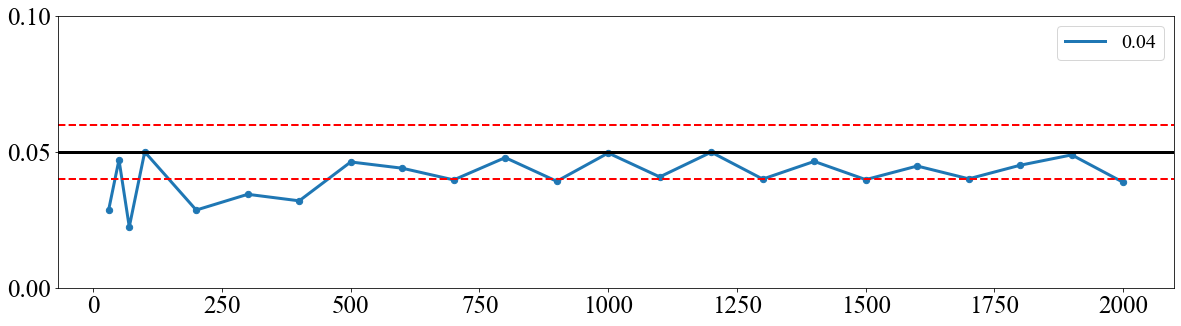

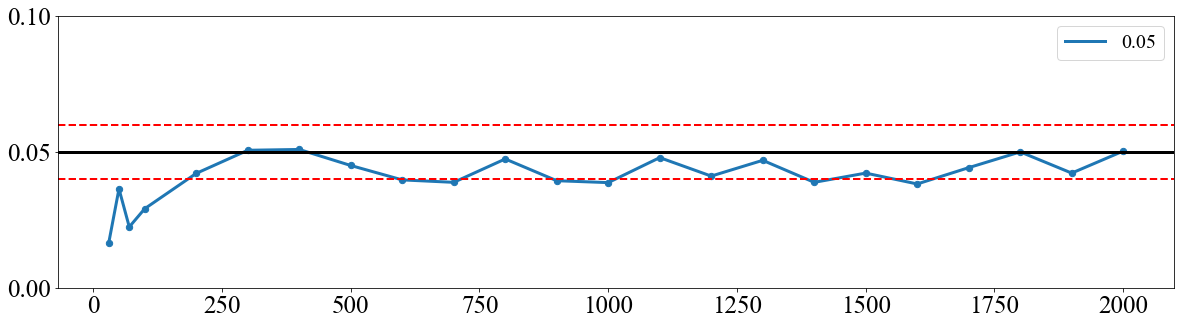

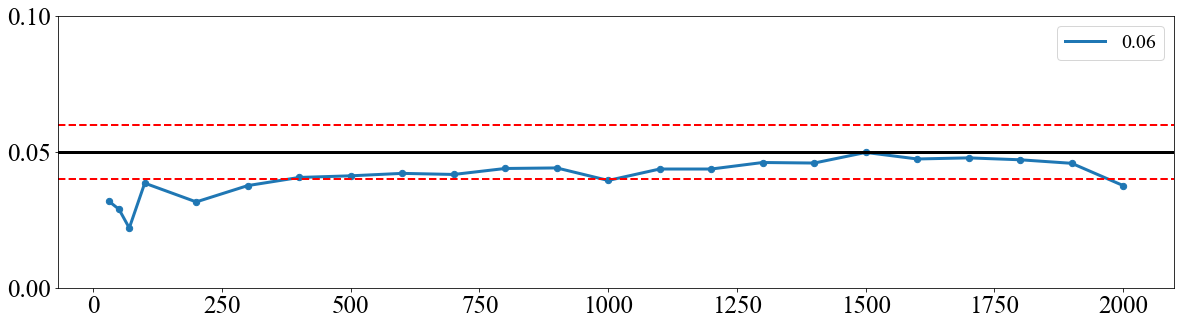

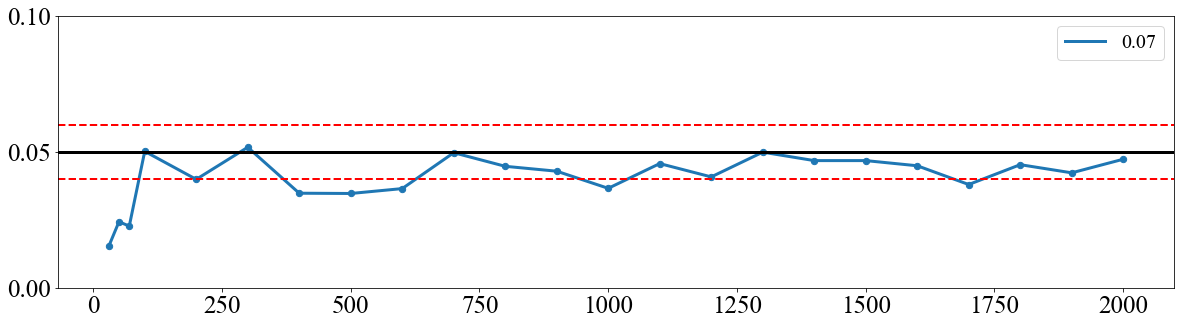

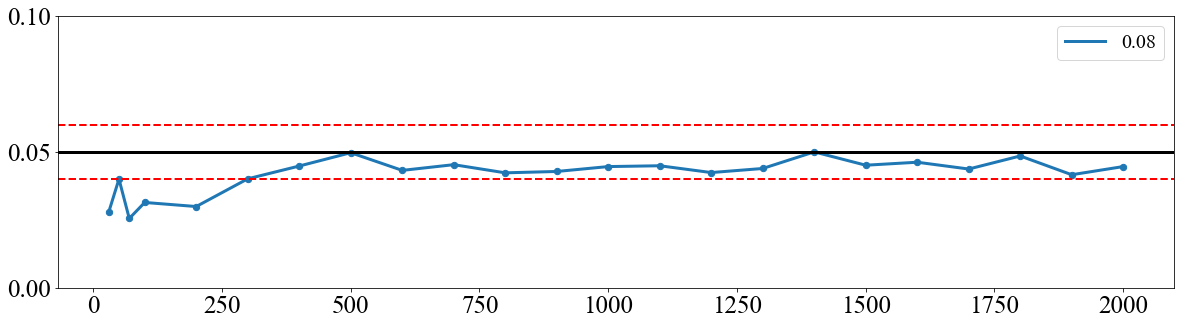

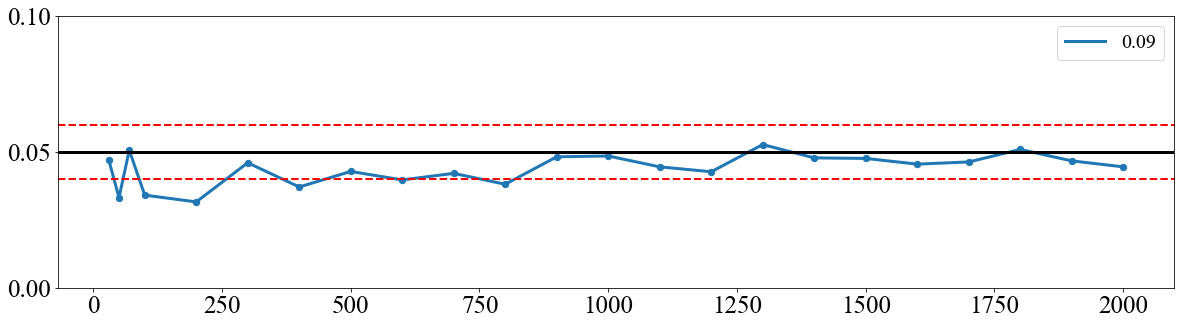

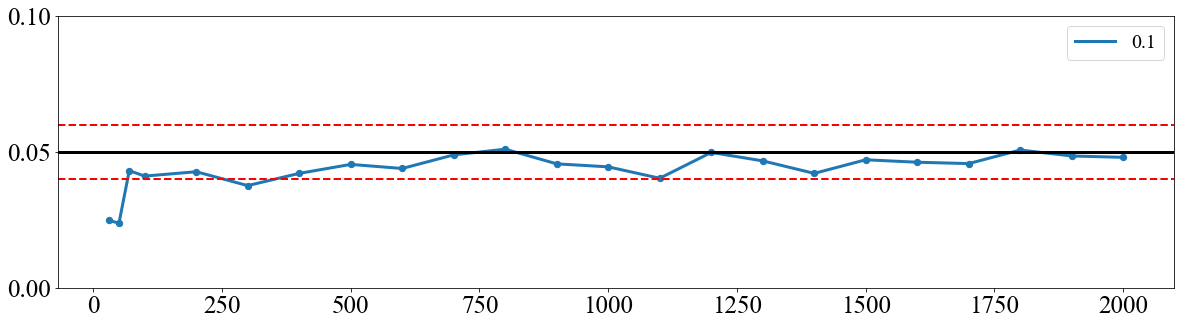

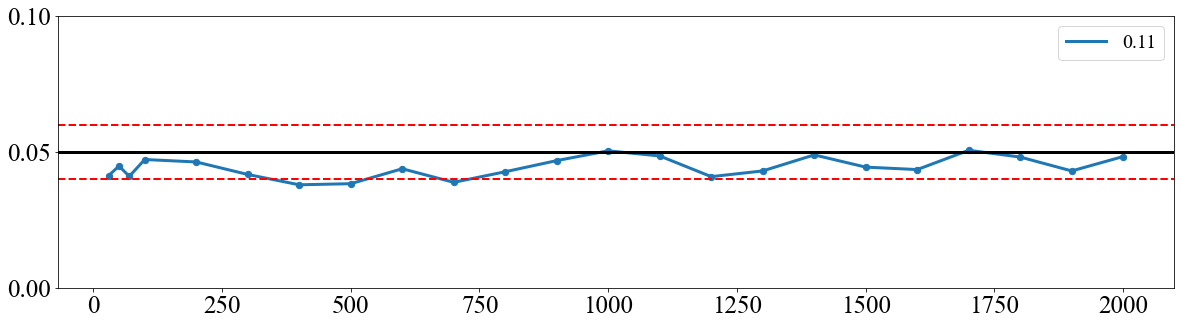

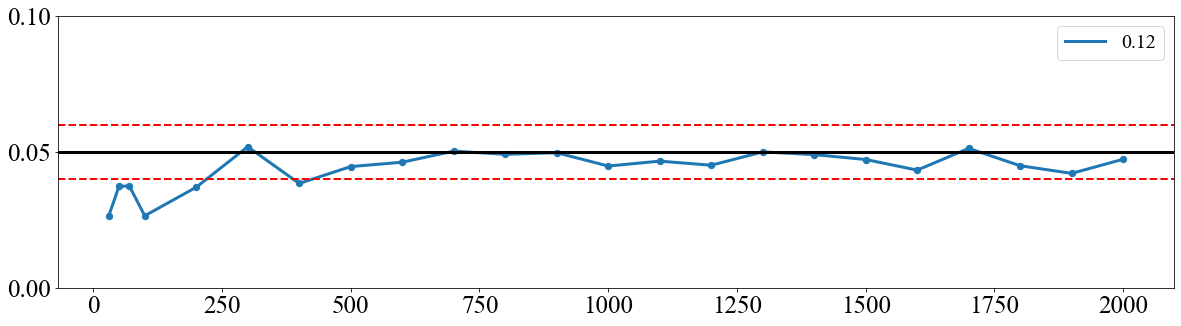

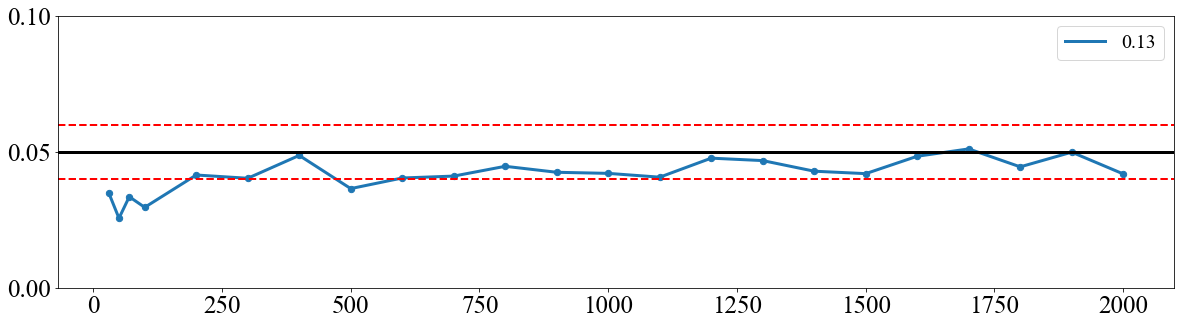

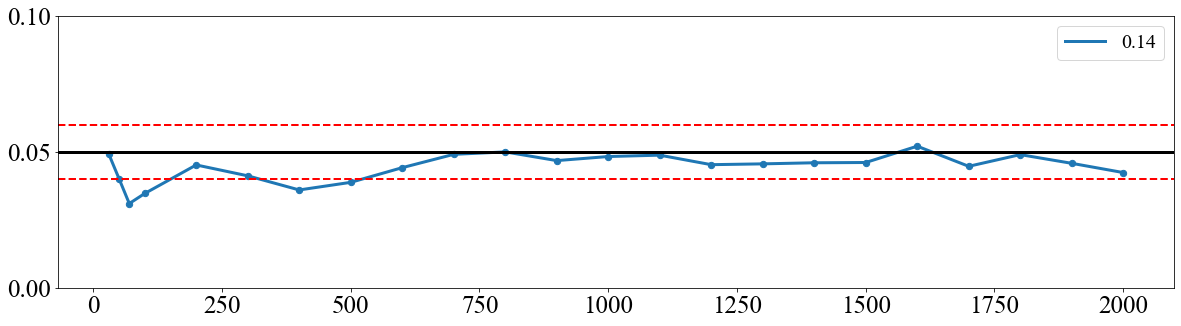

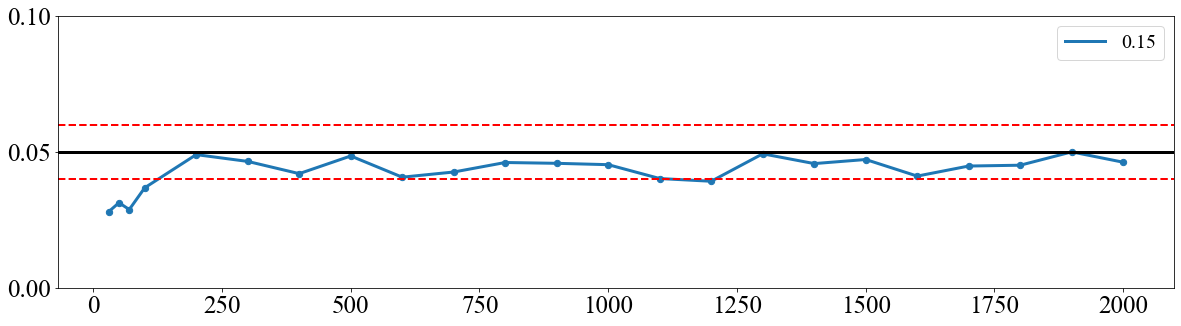

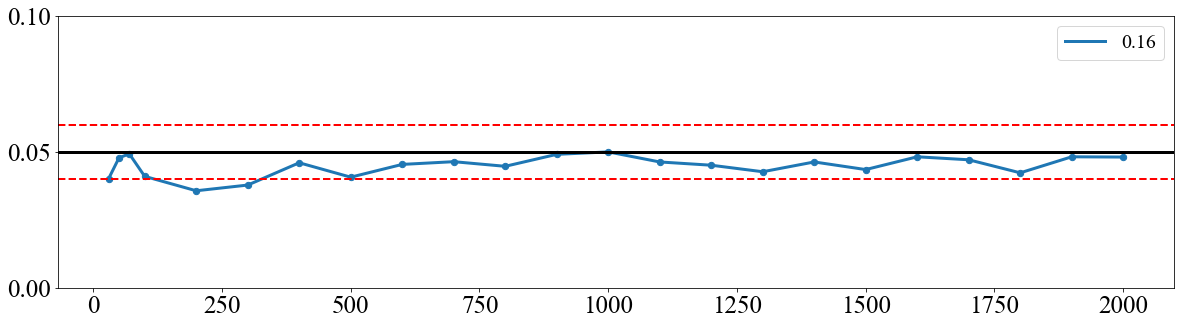

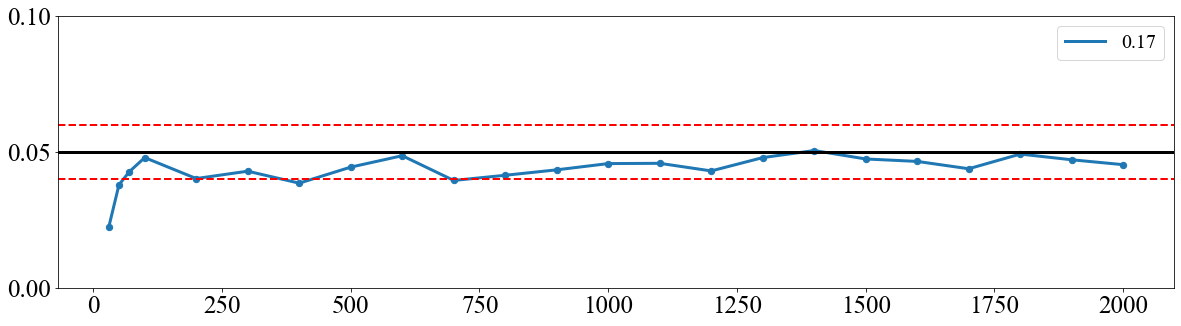

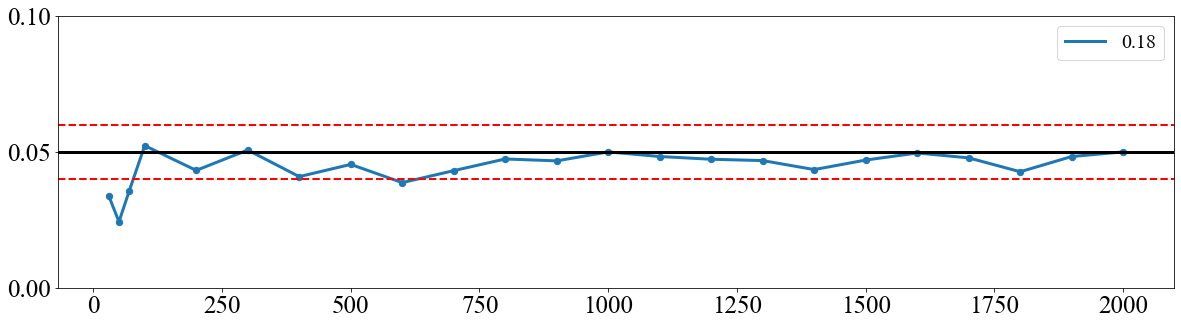

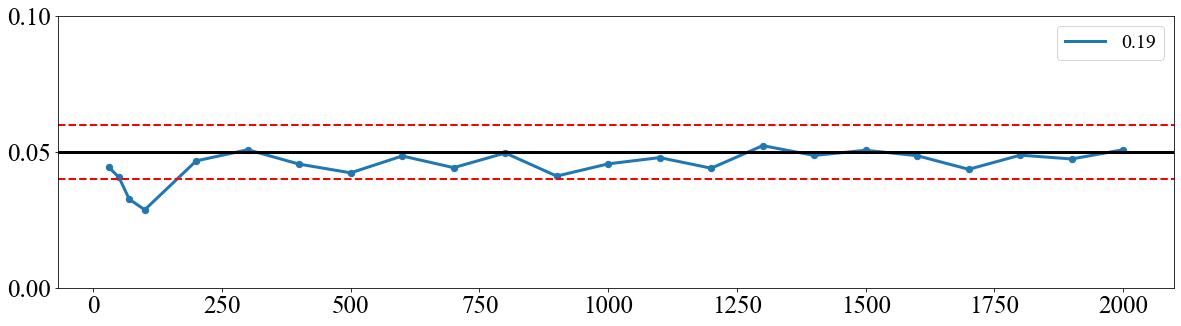

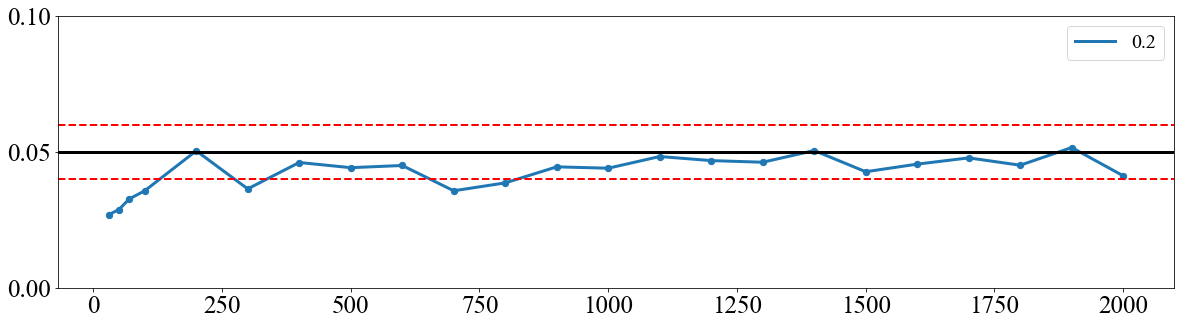

In [19]:
for c in df222.columns: 
    plt.figure(figsize = (20, 5))
    plt.scatter(x = df222[c].index, y = df222[c], s = 40)
    plt.plot(df222[c].index, df222[c], "-", label = c, linewidth = 3) 
    plt.axhline(α, color = 'black', linewidth = 3) 
    plt.axhline(α + 0.01, color = 'red', linestyle = '--', linewidth = 2) 
    plt.axhline(α - 0.01, color = 'red', linestyle = '--', linewidth = 2) 
    plt.ylim([0, .1]) 
    plt.xticks(fontsize = 25) 
    plt.yticks([0, α, .1], fontsize = 25)
    #plt.yticks(list(np.arange(0, .11, .01)))
    plt.legend(fontsize = 20) 
    plt.show() 